In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [2]:
startdate = date.datetime(2019, 3, 20)
enddate = date.datetime(2020, 3, 20)
tag = 'C'
data = pdr.get_data_yahoo(tag, start = startdate, end = enddate)

In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,65.599998,64.220001,65.260002,64.300003,17494000.0,62.547298
2019-03-21,64.309998,62.919998,63.669998,63.910000,18638300.0,62.167927
2019-03-22,63.230000,60.450001,62.980000,60.980000,27527400.0,59.317787
2019-03-25,61.660000,60.049999,60.980000,60.330002,20899300.0,58.685509
2019-03-26,61.349998,60.529999,60.990002,61.220001,14740300.0,59.551254


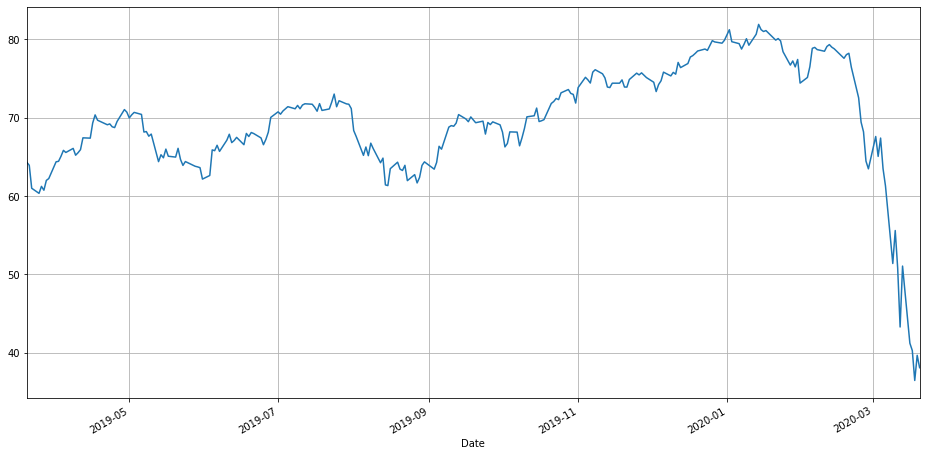

In [4]:
%matplotlib inline 
fig = plt.figure(figsize = (16,8))
data.Close.plot()
plt.grid()

In [5]:
def ROC(df, n):
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M/N, name = 'ROC_' + str(n))
    df = df.join(ROC)
    Cr = pd.Series(df['Close'].shift(1), name = 'Cr')
    df = df.join(Cr)
    ROCr = pd.Series(ROC.shift(1), name = 'ROC_' + str(n) + '_r')
    df = df.join(ROCr)
    df['Recomendación'] = '-'
    
    df.loc[((ROC > 0) & (ROCr < 0)), 'Recomendación'] = 'Se recomienda COMPRAR la acción.'
    df.loc[((ROC < 0) & (ROCr > 0)), 'Recomendación'] = 'Se recomienda VENDER la acción.'
    df.loc[((df['Close'] < Cr) & ((ROC > 0) & (ROCr < 0) & (ROC > ROCr))), 'Recomendación'] = 'Se recomienda COMPRAR la acción. (DIV)'
    df.loc[((df['Close'] > Cr) & ((ROC < 0) & (ROCr > 0) & (ROC < ROCr))), 'Recomendación'] = 'Se recomienda VENDER la acción. (DIV)'    
    
    return df

In [6]:
df2 = ROC(data, 10)

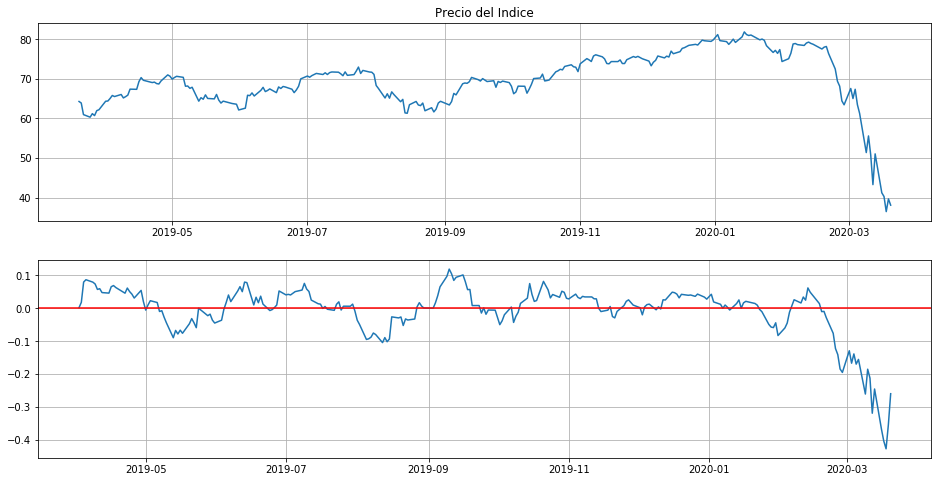

,Close,ROC_10,Recomendación
Date,,,
2019-05-01,69.959999,-0.005544,Se recomienda VENDER la acción.
2019-05-02,70.360001,0.009904,Se recomienda COMPRAR la acción.
2019-05-07,68.160004,-0.009734,Se recomienda VENDER la acción.
2019-05-24,64.389999,0.000155,Se recomienda COMPRAR la acción.
2019-05-28,63.790001,-0.022525,Se recomienda VENDER la acción.
2019-06-05,65.779999,0.017321,Se recomienda COMPRAR la acción. (DIV)
2019-06-24,67.410004,-0.006924,Se recomienda VENDER la acción.
2019-06-26,67.220001,0.002087,Se recomienda COMPRAR la acción.
2019-07-17,70.820000,-0.000423,Se recomienda VENDER la acción.


In [7]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df2.Close)
plt.title('Precio del Indice')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_10)
plt.axhline(y=0, color= 'r')
plt.grid()
plt.show()
df2.loc[df2['Recomendación'] != '-',['Close', 'ROC_10', 'Recomendación']]
#df2[['Close', 'ROC_10', 'Recomendación']]